In [3]:
import nltk


In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold, cross_validate
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score

In [5]:
Data_Spam=pd.read_csv("E:\SEM 3-1\Assignment LAB ML\spam.csv",encoding='latin-1')
print(Data_Spam)

        v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  


In [6]:

Data_Spam.drop(Data_Spam.columns[Data_Spam.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

print(Data_Spam)

        v1                                                 v2
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will Ì_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [7]:
print(Data_Spam['v1'])
Data_Spam.shape

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: v1, Length: 5572, dtype: object


(5572, 2)

In [8]:
print(Data_Spam['v2'])

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5572, dtype: object


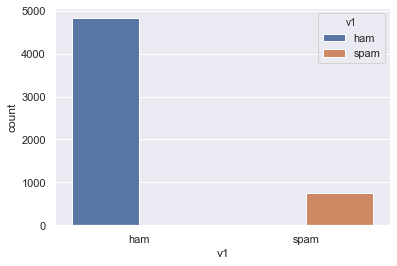

In [9]:
sns.set(style="darkgrid")
sns.countplot(x="v1",hue="v1",data=Data_Spam) #DAtaset is not balanced

In [10]:
Data_Spam['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

In [11]:

Data_Spam.isnull().sum() #No Null values

v1    0
v2    0
dtype: int64

In [98]:
classes = Data_Spam['v1']
encoder = LabelEncoder()
Y = encoder.fit_transform(classes)

In [99]:
print(Y[:10])

[0 0 1 0 0 1 0 0 1 1]


In [12]:
Texts=Data_Spam['v2']
Y= Data_Spam['v1']
print(Texts)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5572, dtype: object


In [13]:

len_of_texts=[]
for i in range (0,Texts.shape[0]):
    len_of_texts.append(len(Texts[i]))

In [14]:
print(len_of_texts)
Data_Spam['Length_of_messages']= len_of_texts

[111, 29, 155, 49, 61, 148, 77, 160, 158, 154, 109, 136, 156, 196, 35, 149, 26, 81, 58, 156, 41, 49, 53, 88, 57, 144, 30, 134, 75, 64, 130, 189, 29, 84, 159, 123, 47, 28, 27, 155, 82, 142, 172, 19, 72, 32, 45, 31, 67, 148, 58, 124, 80, 291, 120, 76, 161, 34, 22, 40, 108, 48, 25, 56, 110, 153, 124, 161, 80, 34, 46, 29, 45, 42, 20, 43, 73, 50, 42, 76, 22, 32, 32, 36, 14, 55, 121, 144, 42, 41, 62, 195, 141, 139, 107, 125, 33, 51, 184, 57, 81, 76, 160, 183, 44, 95, 43, 82, 115, 30, 40, 31, 96, 159, 143, 156, 153, 72, 86, 144, 157, 53, 156, 52, 40, 20, 244, 22, 107, 28, 9, 39, 25, 126, 162, 38, 34, 46, 155, 86, 33, 27, 158, 42, 25, 48, 159, 84, 33, 30, 45, 59, 25, 160, 384, 28, 27, 157, 124, 146, 115, 64, 85, 152, 155, 51, 157, 74, 67, 59, 50, 94, 33, 105, 61, 65, 26, 146, 66, 126, 159, 23, 65, 24, 26, 152, 34, 149, 55, 88, 72, 185, 37, 111, 92, 28, 28, 64, 131, 40, 28, 84, 174, 24, 25, 64, 156, 28, 86, 39, 73, 26, 23, 24, 31, 58, 48, 41, 32, 159, 25, 161, 22, 119, 143, 69, 137, 30, 165, 34

In [16]:
print(Texts)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5572, dtype: object


In [17]:
print(Data_Spam)

        v1                                                 v2  \
0      ham  Go until jurong point, crazy.. Available only ...   
1      ham                      Ok lar... Joking wif u oni...   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...   
3      ham  U dun say so early hor... U c already then say...   
4      ham  Nah I don't think he goes to usf, he lives aro...   
...    ...                                                ...   
5567  spam  This is the 2nd time we have tried 2 contact u...   
5568   ham              Will Ì_ b going to esplanade fr home?   
5569   ham  Pity, * was in mood for that. So...any other s...   
5570   ham  The guy did some bitching but I acted like i'd...   
5571   ham                         Rofl. Its true to its name   

      Length_of_messages  
0                    111  
1                     29  
2                    155  
3                     49  
4                     61  
...                  ...  
5567                 161  
556

 <h1><font color='black'> <b>Data Cleaning</b> </font></h1>

In [18]:
import string
string.punctuation

def remove_punctuation(msg):
    removed= [c for c in msg if c not in string.punctuation]
    return ''.join(removed)



In [19]:

def clean_messages(message):
    processed= message.str.replace(r'\b[\w\-.]+?@\w+?\.\w{2,4}\b', 'emailaddr',)
    processed= processed.str.replace(r'(http[s]?\S+)|(\w+\.[A-Za-z]{2,4}\S*)','webadress')
    processed =processed.str.replace(r'£|\$', 'moneysymbol')
    
    processed= processed.str.replace(r'\b(\+\d{1,2}\s)?\d?[\-(.]?\d{3}\)?[\s.-]?\d{3}[\s.-]?\d{4}\b',
                                  'phonenumber')
    processed = processed.str.replace(r'\d+(\.\d+)?','numbers')
    processed_nopunc= processed.apply(lambda x:remove_punctuation(x))
    processed_lower= processed_nopunc.str.lower()
    
    return processed_lower
    

In [20]:
print(Texts[2])

Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


In [21]:
cleaned_messages= clean_messages(Texts)
print(cleaned_messages)

0       go until jurong point crazy available only in ...
1                                 ok lar joking wif u oni
2       free entry in numbers a wkly comp to win fa cu...
3             u dun say so early hor u c already then say
4       nah i dont think he goes to usf he lives aroun...
                              ...                        
5567    this is the numbersnd time we have tried numbe...
5568                  will ì b going to esplanade fr home
5569    pity  was in mood for that soany other suggest...
5570    the guy did some bitching but i acted like id ...
5571                            rofl its true to its name
Name: v2, Length: 5572, dtype: object


In [22]:
print(cleaned_messages[2])

free entry in numbers a wkly comp to win fa cup final tkts numbersst may numbers text fa to numbers to receive entry questionstd txt ratetcs apply numbersovernumberss


 <h1><font color='black'> <b>Data Tokenization</b> </font></h1>

In [23]:
#Tokenizing

tokens=[]

for i in range (0,len(cleaned_messages)):
    X=nltk.word_tokenize(cleaned_messages[i])
    tokens.append(X)
    
    
#print(tokens)

Data_Spam['Tokenized_text']=tokens

 <h1><font color='black'> <b>Stemming</b> </font></h1>

In [24]:
Data_Spam.head(10)

,v1,v2,Length_of_messages,Tokenized_text
0,ham,"Go until jurong point, crazy.. Available only ...",111,"[go, until, jurong, point, crazy, available, o..."
1,ham,Ok lar... Joking wif u oni...,29,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[free, entry, in, numbers, a, wkly, comp, to, ..."
3,ham,U dun say so early hor... U c already then say...,49,"[u, dun, say, so, early, hor, u, c, already, t..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,"[nah, i, dont, think, he, goes, to, usf, he, l..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...,148,"[freemsg, hey, there, darling, its, been, numb..."
6,ham,Even my brother is not like to speak with me. ...,77,"[even, my, brother, is, not, like, to, speak, ..."
7,ham,As per your request 'Melle Melle (Oru Minnamin...,160,"[as, per, your, request, melle, melle, oru, mi..."
8,spam,WINNER!! As a valued network customer you have...,158,"[winner, as, a, valued, network, customer, you..."
9,spam,Had your mobile 11 months or more? U R entitle...,154,"[had, your, mobile, numbers, months, or, more,..."


In [25]:
#Removing Stop words
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
print(stopwords[:20])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


In [26]:

def remove_stopwords(tokenized):
    cleared_stop_words= [w for w in tokenized if w not in stopwords]
    return cleared_stop_words

    

In [27]:
Data_Spam['Tokenized_text']= Data_Spam['Tokenized_text'].apply(lambda row: remove_stopwords(row))

In [28]:
Data_Spam.head(10)

,v1,v2,Length_of_messages,Tokenized_text
0,ham,"Go until jurong point, crazy.. Available only ...",111,"[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,29,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[free, entry, numbers, wkly, comp, win, fa, cu..."
3,ham,U dun say so early hor... U c already then say...,49,"[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,"[nah, dont, think, goes, usf, lives, around, t..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...,148,"[freemsg, hey, darling, numbers, weeks, word, ..."
6,ham,Even my brother is not like to speak with me. ...,77,"[even, brother, like, speak, treat, like, aids..."
7,ham,As per your request 'Melle Melle (Oru Minnamin...,160,"[per, request, melle, melle, oru, minnaminungi..."
8,spam,WINNER!! As a valued network customer you have...,158,"[winner, valued, network, customer, selected, ..."
9,spam,Had your mobile 11 months or more? U R entitle...,154,"[mobile, numbers, months, u, r, entitled, upda..."


In [29]:
#Stemming
from nltk.stem import PorterStemmer
port_stem= PorterStemmer()

In [30]:
def stemmer(token_text):
    text=[port_stem.stem(word) for word in token_text]
    return text 


In [31]:
Data_Spam['Stemmed_text']=Data_Spam['Tokenized_text'].apply(lambda row:stemmer(row))

In [32]:
Data_Spam.head(10)
processed=Data_Spam['Stemmed_text']

 <h1><font color='black'> <b>Most Common Words detection
    </b> </font></h1>

In [115]:

print(processed)

0       [go, jurong, point, crazi, avail, bugi, n, gre...
1                            [ok, lar, joke, wif, u, oni]
2       [free, entri, number, wkli, comp, win, fa, cup...
3           [u, dun, say, earli, hor, u, c, alreadi, say]
4       [nah, dont, think, goe, usf, live, around, tho...
                              ...                        
5567    [numbersnd, time, tri, number, contact, u, u, ...
5568                       [ì, b, go, esplanad, fr, home]
5569                         [piti, mood, soani, suggest]
5570    [guy, bitch, act, like, id, interest, buy, som...
5571                                   [rofl, true, name]
Name: Stemmed_text, Length: 5572, dtype: object


In [87]:

unique_words = []

for texts in processed:
    for word in texts:
        unique_words.append(word)
    
        


In [88]:
from collections import Counter
dict_feq= Counter(unique_words)
print(dict_feq)


Counter({'number': 1900, 'u': 1119, 'call': 653, 'im': 463, 'webadress': 457, 'go': 449, 'get': 447, 'phonenumb': 397, 'ur': 384, 'come': 297, 'dont': 279, 'ok': 277, 'ltgt': 276, 'free': 275, 'know': 270, 'like': 255, 'got': 250, 'åmoneysymbolnumb': 248, 'love': 244, 'want': 243, 'day': 241, 'time': 238, 'good': 235, 'text': 224, 'ill': 211, 'send': 204, 'need': 186, 'one': 180, 'txt': 176, 'see': 171, 'today': 169, 'think': 166, 'home': 162, 'take': 160, 'lor': 160, 'repli': 159, 'stop': 158, 'tell': 156, 'sorri': 156, 'still': 153, 'r': 153, 'back': 152, 'mobil': 150, 'make': 147, 'n': 143, 'phone': 141, 'say': 138, 'new': 136, 'week': 134, 'work': 134, 'pleas': 134, 'later': 134, 'well': 133, 'da': 132, 'ask': 132, 'hi': 131, 'miss': 125, 'meet': 123, 'hope': 123, 'cant': 123, 'happi': 119, 'ì': 117, 'night': 117, 'claim': 115, 'wait': 114, 'thing': 114, 'tri': 113, 'much': 113, 'great': 112, 'oh': 112, 'give': 112, 'hey': 111, 'pl': 110, 'dear': 110, 'wat': 109, 'messag': 107, 'na

In [89]:
most_common_ofall=dict_feq.most_common(100)

In [91]:
#getting just words

most_common_words=[]
for k,v in most_common_ofall:
    most_common_words.append(k)

In [106]:
print(most_common_words)
print('\n Length of most common words',len(most_common_words))

['number', 'u', 'call', 'im', 'webadress', 'go', 'get', 'phonenumb', 'ur', 'come', 'dont', 'ok', 'ltgt', 'free', 'know', 'like', 'got', 'åmoneysymbolnumb', 'love', 'want', 'day', 'time', 'good', 'text', 'ill', 'send', 'need', 'one', 'txt', 'see', 'today', 'think', 'home', 'take', 'lor', 'repli', 'stop', 'tell', 'sorri', 'still', 'r', 'back', 'mobil', 'make', 'n', 'phone', 'say', 'new', 'week', 'work', 'pleas', 'later', 'well', 'da', 'ask', 'hi', 'miss', 'meet', 'hope', 'cant', 'happi', 'ì', 'night', 'claim', 'wait', 'thing', 'tri', 'much', 'great', 'oh', 'give', 'hey', 'pl', 'dear', 'wat', 'messag', 'na', 'friend', 'thank', 'way', 'prize', 'right', 'feel', 'that', 'msg', 'wan', 'let', 'pick', 'alreadi', 'even', 'tomorrow', 'ye', 'realli', 'yeah', 'said', 'min', 'e', 'babe', 'leav', 'co']

 Length of most common words 100


 <h1><font color='black'> <b>Data Vectorization
    </b> </font></h1>

In [100]:
print(Y)

[0 0 1 ... 0 0 0]


In [108]:
cv=CountVectorizer(vocabulary=most_common_words,analyzer='word',token_pattern = '[a-zA-Z]+')

In [112]:
print((cv.get_feature_names()))

['number', 'u', 'call', 'im', 'webadress', 'go', 'get', 'phonenumb', 'ur', 'come', 'dont', 'ok', 'ltgt', 'free', 'know', 'like', 'got', 'åmoneysymbolnumb', 'love', 'want', 'day', 'time', 'good', 'text', 'ill', 'send', 'need', 'one', 'txt', 'see', 'today', 'think', 'home', 'take', 'lor', 'repli', 'stop', 'tell', 'sorri', 'still', 'r', 'back', 'mobil', 'make', 'n', 'phone', 'say', 'new', 'week', 'work', 'pleas', 'later', 'well', 'da', 'ask', 'hi', 'miss', 'meet', 'hope', 'cant', 'happi', 'ì', 'night', 'claim', 'wait', 'thing', 'tri', 'much', 'great', 'oh', 'give', 'hey', 'pl', 'dear', 'wat', 'messag', 'na', 'friend', 'thank', 'way', 'prize', 'right', 'feel', 'that', 'msg', 'wan', 'let', 'pick', 'alreadi', 'even', 'tomorrow', 'ye', 'realli', 'yeah', 'said', 'min', 'e', 'babe', 'leav', 'co']


In [111]:
Data_Spam.head(10)

,v1,v2,Length_of_messages,Tokenized_text,Stemmed_text
0,ham,"Go until jurong point, crazy.. Available only ...",111,"[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazi, avail, bugi, n, gre..."
1,ham,Ok lar... Joking wif u oni...,29,"[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[free, entry, numbers, wkly, comp, win, fa, cu...","[free, entri, number, wkli, comp, win, fa, cup..."
3,ham,U dun say so early hor... U c already then say...,49,"[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,"[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...,148,"[freemsg, hey, darling, numbers, weeks, word, ...","[freemsg, hey, darl, number, week, word, back,..."
6,ham,Even my brother is not like to speak with me. ...,77,"[even, brother, like, speak, treat, like, aids...","[even, brother, like, speak, treat, like, aid,..."
7,ham,As per your request 'Melle Melle (Oru Minnamin...,160,"[per, request, melle, melle, oru, minnaminungi...","[per, request, mell, mell, oru, minnaminungint..."
8,spam,WINNER!! As a valued network customer you have...,158,"[winner, valued, network, customer, selected, ...","[winner, valu, network, custom, select, receiv..."
9,spam,Had your mobile 11 months or more? U R entitle...,154,"[mobile, numbers, months, u, r, entitled, upda...","[mobil, number, month, u, r, entitl, updat, la..."


In [131]:
from nltk.tokenize.treebank import TreebankWordDetokenizer

#Data_Spam['All_cleaned']=TreebankWordDetokenizer().detokenize(Data_Spam['Stemmed_text'])



All_cleaned=[]

for i in range (0,(Data_Spam.shape[0])):
    listToStr = ' '.join(map(str, processed[i])) 
    All_cleaned.append(listToStr)
    
     

In [133]:
#individual list to a single list of texts
print(All_cleaned)

Data_Spam['all_cleaned']=All_cleaned

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat', 'ok lar joke wif u oni', 'free entri number wkli comp win fa cup final tkt numbersst may number text fa number receiv entri questionstd txt ratetc appli numbersovernumberss', 'u dun say earli hor u c alreadi say', 'nah dont think goe usf live around though', 'freemsg hey darl number week word back id like fun still tb ok xxx std chg send åmoneysymbolnumb rcv', 'even brother like speak treat like aid patent', 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press number copi friend callertun', 'winner valu network custom select receivea åmoneysymbolnumb prize reward claim call phonenumb claim code klnumber valid number hour', 'mobil number month u r entitl updat latest colour mobil camera free call mobil updat co free phonenumb', 'im gon na home soon dont want talk stuff anymor tonight k ive cri enough today', 'six chanc win cash number numbersnumb pound txt cshnumber send numbe

In [140]:
print(All_cleaned[2])

free entri number wkli comp win fa cup final tkt numbersst may number text fa number receiv entri questionstd txt ratetc appli numbersovernumberss


In [135]:
Data_Spam.head()

,v1,v2,Length_of_messages,Tokenized_text,Stemmed_text,all_cleaned
0,ham,"Go until jurong point, crazy.. Available only ...",111,"[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazi, avail, bugi, n, gre...",go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,29,"[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]",ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[free, entry, numbers, wkly, comp, win, fa, cu...","[free, entri, number, wkli, comp, win, fa, cup...",free entri number wkli comp win fa cup final t...
3,ham,U dun say so early hor... U c already then say...,49,"[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]",u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,"[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho...",nah dont think goe usf live around though


In [141]:
X=cv.fit_transform(Data_Spam['all_cleaned']).toarray()

In [143]:
df=pd.DataFrame(X,columns=cv.get_feature_names())

In [144]:
df

,number,u,call,im,webadress,go,get,phonenumb,ur,come,...,tomorrow,ye,realli,yeah,said,min,e,babe,leav,co
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,3,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5568,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


 <h1><font color='black'> <b>Using  Multinomial Naïve Bayes 
    </b> </font></h1>

In [147]:
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score)}
k_fold = KFold(n_splits=10)
model = MultinomialNB()
scores = cross_validate(model, X, Y, cv = k_fold, scoring = scoring,verbose=1)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


In [149]:
def average(X):
    return sum(X)/len(X)

In [150]:
print('Accuracy : ' , scores['test_accuracy'])
print('Recall : ' , scores['test_recall'])
print('Precision : ' , scores['test_precision'])
print('Average Accuracy : ',average(scores['test_accuracy']))
print('Average Recall : ',average(scores['test_recall']))
print('Average Precision : ',average(scores['test_precision']))

Accuracy :  [0.97132616 0.96236559 0.97127469 0.97845601 0.95152603 0.96947935
 0.96409336 0.96409336 0.96588869 0.98025135]
Recall :  [0.8875     0.88636364 0.85714286 0.91549296 0.77777778 0.87692308
 0.83561644 0.84337349 0.89041096 0.94444444]
Precision :  [0.91025641 0.87640449 0.90909091 0.91549296 0.8358209  0.86363636
 0.88405797 0.90909091 0.85526316 0.90666667]
Average Accuracy :  0.9678754592897179
Average Recall :  0.871504564163445
Average Precision :  0.8865780735301378


 <h1><font color='black'> <b>Using tf-idf
    </b> </font></h1>

In [155]:
vectorizer = TfidfVectorizer(vocabulary = most_common_words, analyzer = 'word', token_pattern = '[a-zA-Z]+')
tf_idf = vectorizer.fit_transform(Data_Spam['all_cleaned'])

In [156]:
k_fold_tfid = KFold(n_splits=10)
model_tfid = MultinomialNB()
scores_tfid = cross_validate(model_tfid, tf_idf, Y, cv = k_fold_tfid , scoring = scoring,verbose=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


In [157]:
print('Accuracy : ' , scores_tfid['test_accuracy'])
print('Recall : ' , scores_tfid['test_recall'])
print('Precision : ' , scores_tfid['test_precision'])
print('Average Accuracy : ',average(scores_tfid['test_accuracy']))
print('Average Recall : ',average(scores_tfid['test_recall']))
print('Average Precision : ',average(scores_tfid['test_precision']))

Accuracy :  [0.96057348 0.96057348 0.96229803 0.96409336 0.9551167  0.97307002
 0.9551167  0.95332136 0.95870736 0.98563734]
Recall :  [0.775      0.77272727 0.71428571 0.76056338 0.65277778 0.78461538
 0.71232877 0.69879518 0.73972603 0.88888889]
Precision :  [0.93939394 0.97142857 0.98039216 0.94736842 1.         0.98076923
 0.92857143 0.98305085 0.93103448 1.        ]
Average Accuracy :  0.9628507815164443
Average Recall :  0.7499708393820168
Average Precision :  0.9662009078294795


 <h1><font color='black'> <b>Using Some other models
    </b> </font></h1>
  <h3><font color='black'> <b>Using support vector machine
    </b> </font></h3>

In [160]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 2)

In [171]:
from sklearn import svm
clf = svm.LinearSVC(loss='hinge',max_iter=8000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


In [172]:
accuracy_score(y_test,y_pred)

0.9641255605381166

 <h3><font color='black'> <b>Using Logistic Regression
    </b> </font></h3>

In [174]:
from sklearn.linear_model import LogisticRegression

In [175]:
log_reg = LogisticRegression(random_state=2).fit(X_train, y_train)

pred_y=log_reg.predict(X_test)


In [183]:
log_reg.score(X_test,y_test)

0.9659192825112107